### Data Simulation

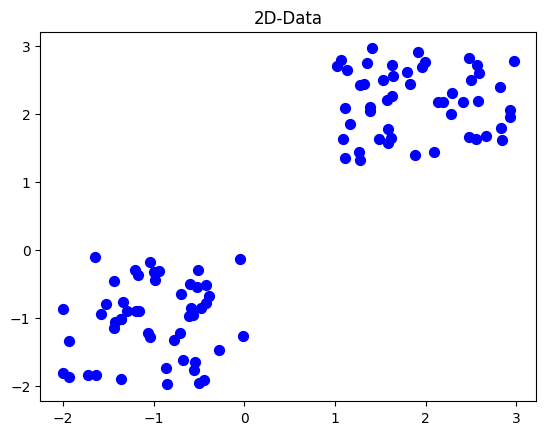

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Square data
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.title('2D-Data')
plt.show()

### Elbow method: Hyperparameter optimization

In [7]:
from sklearn.cluster import KMeans
# objective function is argmin of c (sum of (|x-c|)^2 )  c: centroid, x=point in data set
objective_function=[]
for i in range(1,6):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(X)
    objective_function.append(clustering.inertia_)
#inertia is calculaing min intra cluster distance
# objective function (SSE) contains min intra cluster distances
objective_function

[534.9142052371811,
 68.81513425185645,
 56.28611803372977,
 41.67844623153296,
 32.806463384691554]

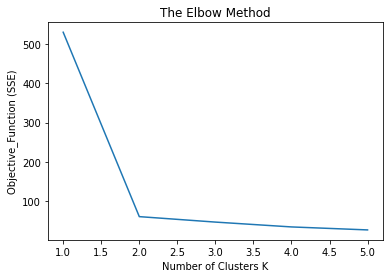

In [ ]:
# for finding optimal no of clusters we use elbow technique
# Elbow technique is plot between no of clusters and objective_function
# we take k at a point where the objective function value have elbow shape

plt.plot(range(1,6), objective_function)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('Objective_Function (SSE)')
plt.show()

### Training the K-means model with optimal number of clusters

In [ ]:
# Training the model with optimal no of clusters
tuned_clustering=KMeans(n_clusters=2,init='k-means++',random_state=0)
labels=tuned_clustering.fit_predict(X)
# x and y  coordinates of all clusters
# Centroids of clusters
tuned_clustering.cluster_centers_[:]

array([[-1.04927563, -1.10150149],
       [ 1.86968179,  2.09120628]])

### Visualize the results

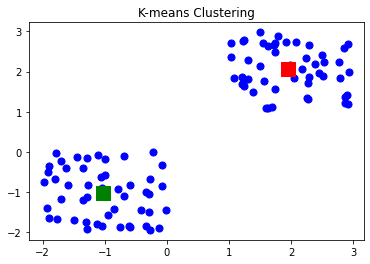

In [ ]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-1.0286318 , -1.0201732, s=200, c='g', marker='s')
plt.scatter(1.95719006,  2.05554648, s=200, c='r', marker='s')


### Evaluation: How good our clustering is
*   To check how good our clustering, we can use the Silhouette coefficient

* Silhouette coefficient= (b-a)/max(b,a)

* If our clustering is good then we have small intracluster distance then the Silhouette coefficient value is positive.

Silhouette coefficient lies in between -1 and 1

If the value moves towards 1 then clustering is good

If the value moves towards $<$ 0 then clustering is bad

### Example
In the below diagram, we have two clusters C1 and C:

a= intracluster distance

b=intercluster distance


![Sihouette_coeeficient.png](https://drive.google.com/uc?export=view&id=1NMsM43D8hJ5yZcLbAj6sdR2MQYD-GPwr)

In [ ]:
from sklearn import metrics
metrics.silhouette_score(X, tuned_clustering.labels_,
metric='euclidean')

0.7658573747916239

It’s moving towards 1 so our clustering is good

## [How to determine epsilon and MinPts parameters of DBSCAN clustering?](http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/)

### Minimum Samples (“MinPts”)

There is no automatic way to determine the **MinPts** value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. Here are a few rules of thumb for selecting the MinPts value:

*   The larger the data set, the larger the value of MinPts should be.
*   If the data set is noisier, choose a larger value of MinPts.
*   Generally, MinPts should be greater than or equal to the dimensionality of the data set.
*   For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
*   If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

### Epsilon (ε)

As introduced in our Lecture 7, Page 14, one technique to automatically determine the optimal ε value is to calculate the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
neigh=NearestNeighbors(n_neighbors=4)
distance=neigh.fit(X)

In [ ]:
# indices and distance values
distances,indices=distance.kneighbors(X)

In [ ]:
distances.shape

(100, 4)

In [ ]:
# Now sorting the distance increasing order
sorting_distances=np.sort(distances,axis=0)

In [ ]:
# sorted distances
sorted_distances=sorting_distances[:,3]
sorted_distances.shape

(100,)

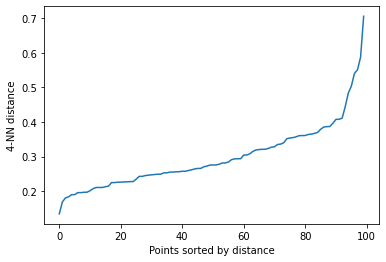

In [ ]:
# plot between distance vs epsilon
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('4-NN distance')
plt.show()

### DBSCAN Clustering

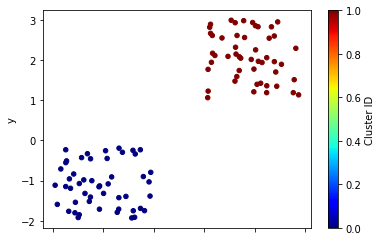

In [ ]:
from sklearn.cluster import DBSCAN

import pandas as pd

db = DBSCAN(eps=0.6, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
data = pd.DataFrame(X, columns = ['x','y'])
result = pd.concat((data, labels), axis=1)
result.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet')

### Reference

* [Practical Implementation Of K-means, Hierarchical, and DBSCAN Clustering On Dataset With Hyperparameter Optimization](https://medium.com/analytics-vidhya/practical-implementation-of-k-means-hierarchical-and-dbscan-clustering-on-dataset-with-bd7f3d13ef7f)

*  [How to determine epsilon and MinPts parameters of DBSCAN clustering?](http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/)

